
***********
## Question 1 (10 points): 

To start, make a **new** `jupyter notebook` called `lab5_submission.ipynb` and work through the following tasks. 

The first task is answer the following questions using some of the methods we have covered in the lecture/demo. 

* How many houses are in this dataset?
19451
* How many **features** are there for predicting house price? 
9 (in the first set, including empty geometry values)
* Are there any null values in this dataset?
Yes, many in geometry.
* Which three variables are best correlated with house price (include correlation coefficients)?
"sqft_living", "bathrooms", and "bathrooms" are. I think this is the square feet in living space? Bathrooms and bedrooms are the number of rooms.
* Which three variables are least correlated with house price (include correlation coefficients)?
"yr_built", "distance_to_coast", and "long" are the least correlated with house. I'm surprised that distance_to_coast is not that correlated. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Import data
#df = pd.read_csv('./lab5/seattle_house_prices.csv')

# Read dataset


In [2]:

from shapely.geometry import Point

coast = gpd.read_file('./lab5/washington_coastline.shp')
coast_utm = coast.to_crs('EPSG:32610')
water = gpd.read_file('./lab5/Waterbodies_with_History_and_Jurisdictional_detail___wtrbdy_det_area.shp')
water_utm = water.to_crs('EPSG:32610')

sea = pd.read_csv('./lab5/'+ "seattle_house_prices.csv")
sea_gdf = gpd.GeoDataFrame(sea, geometry = gpd.points_from_xy(sea['long'], sea['lat']))
sea_gdf = sea_gdf.set_crs(4326, allow_override=True)
# Reproject everything to UTM 10N (EPSG:32610)
sea_utm = sea_gdf.to_crs('EPSG:32610')
'''
rand_point = Point(5.6e5, 5.27e6)
rand_gdf = gpd.GeoDataFrame(geometry = [rand_point])
rand_gdf = rand_gdf.set_crs(32610)
dist_sea_rand_pnt = []
for i in range(sea_utm.shape[0]):
    dist_sea_rand_pnt.append(rand_gdf.distance(sea_utm['geometry'].iloc[i]).min())
'''

"\nrand_point = Point(5.6e5, 5.27e6)\nrand_gdf = gpd.GeoDataFrame(geometry = [rand_point])\nrand_gdf = rand_gdf.set_crs(32610)\ndist_sea_rand_pnt = []\nfor i in range(sea_utm.shape[0]):\n    dist_sea_rand_pnt.append(rand_gdf.distance(sea_utm['geometry'].iloc[i]).min())\n"

In [3]:
household_income = pd.read_csv('./lab5/'+ "ACS _Household_Income_In_The_Past_12_Months_(In_Inflation-Adjusted_Dollars)___acs_b19001_householdincome.csv")
hh_census_tract_shp = gpd.read_file('./lab5/ACS%3A_Household_Income_In_The_Past_12_Months_(In_Inflation-Adjusted_Dollars)___acs_b19001_householdincome.shp')

hh_in_small = hh_census_tract_shp.loc[:,['GEO_ID_TRT','E19001017','E19001001',"geometry"]]

"""
Take geo id (GEO_ID_TRT), Total households per tract (E19001001), # of hh over 200k income per tract (E19001017)and geometry

divide # by total to get percentage of hh with income over 200k per tract

asssign house %tract value variable depending on tract it's contained in

"""
hh_in_small['percent_200k']= hh_in_small['E19001017'] / hh_in_small['E19001001'] *100
hh_in_small

percent_1percent = []
for i in range(sea_gdf.shape[0]):
    for t in range(398):
        if (sea_gdf['geometry'].iloc[i]).within(hh_in_small['geometry'].loc[t]):
            percent_1percent.append(hh_in_small['percent_200k'].iloc[t])
        
    
    
    #geo_id.append(water_utm.distance(sea_gdf['geometry'].iloc[i]).min())
    

hh_in_small


,GEO_ID_TRT,E19001017,E19001001,geometry,percent_200k
0,53033000100,286,3899,"POLYGON ((-122.28580 47.73368, -122.28559 47.7...",7.335214
1,53033000200,216,3693,"POLYGON ((-122.32359 47.73405, -122.32348 47.7...",5.848903
2,53033000300,126,1159,"POLYGON ((-122.32555 47.73407, -122.32532 47.7...",10.871441
3,53033000401,177,3842,"POLYGON ((-122.34501 47.72633, -122.34498 47.7...",4.606976
4,53033000402,315,2373,"POLYGON ((-122.34737 47.72322, -122.34655 47.7...",13.274336
...,...,...,...,...,...
393,53033032702,389,2497,"POLYGON ((-121.53590 47.54667, -121.53565 47.5...",15.578694
394,53033032703,107,871,"POLYGON ((-121.83219 47.53884, -121.83218 47.5...",12.284730
395,53033032704,312,2499,"POLYGON ((-121.78176 47.52230, -121.78122 47.5...",12.484994
396,53033032800,167,983,"POLYGON ((-121.43171 47.78048, -121.41064 47.7...",16.988810


In [7]:
percent_1percent.append(-99)

In [8]:

sea_gdf['percent of household income over 200K per year, per tract'] = percent_1percent
sea_gdf


,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry,"percent of household income over 200K per year, per tract"
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319,POINT (-122.31900 47.72100),5.848903
1,180000,2,1.00,770,10000,1933,47.7379,-122.233,POINT (-122.23300 47.73790),23.112416
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393,POINT (-122.39300 47.52080),22.573506
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045,POINT (-122.04500 47.61680),41.141279
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005,POINT (-122.00500 47.65610),34.133203
...,...,...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409,POINT (-122.40900 47.57730),12.601800
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346,POINT (-122.34600 47.69930),4.490690
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362,POINT (-122.36200 47.51070),37.752161
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069,POINT (-122.06900 47.53450),19.335468


In [9]:
len(percent_1percent)

19451

In [10]:
# Compute distance to coast
distance_to_coast = []
for i in range(sea_gdf.shape[0]):
    distance_to_coast.append(coast_utm.distance(sea_gdf['geometry'].iloc[i]).min())
    
# Add to DataFrame
sea_gdf['distance_to_coast'] = distance_to_coast
sea_gdf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry,"percent of household income over 200K per year, per tract",distance_to_coast
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319,POINT (-122.31900 47.72100),5.848903,5.088118e+06
1,180000,2,1.00,770,10000,1933,47.7379,-122.233,POINT (-122.23300 47.73790),23.112416,5.088118e+06
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393,POINT (-122.39300 47.52080),22.573506,5.088119e+06
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045,POINT (-122.04500 47.61680),41.141279,5.088119e+06
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005,POINT (-122.00500 47.65610),34.133203,5.088118e+06
...,...,...,...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409,POINT (-122.40900 47.57730),12.601800,5.088119e+06
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346,POINT (-122.34600 47.69930),4.490690,5.088118e+06
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362,POINT (-122.36200 47.51070),37.752161,5.088119e+06
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069,POINT (-122.06900 47.53450),19.335468,5.088119e+06


In [12]:
#downtown seattle coordinates Lat: 47.614200, Long:-122.341350

'''
distance_to_water = []
for i in range(sea_gdf.shape[0]):
    distance_to_water.append(water_utm.distance(sea_gdf['geometry'].iloc[i]).min())
    
# Add to DataFrame
sea_gdf['distance_to_water'] = distance_to_water
sea_gdf
'''

"\ndistance_to_water = []\nfor i in range(sea_gdf.shape[0]):\n    distance_to_water.append(water_utm.distance(sea_gdf['geometry'].iloc[i]).min())\n    \n# Add to DataFrame\nsea_gdf['distance_to_water'] = distance_to_water\nsea_gdf\n"

In [13]:
#downtown seattle coordinates Lat: 47.614200, Long:-122.341350 - this is the most expensive neighborhood

def calc_distance_to_downtown(lat, long):
    lat_dis = abs(lat - 47.614200)
    long_dis = abs(long - -122.341350)
    vec_dis= math.sqrt(abs(lat_dis*lat_dis) + (long_dis*long_dis))
    return vec_dis
    
#distance_to_downtown(47.6142, -122)

In [14]:
# Add to DataFrame
distance_to_downtown = []
for i in range(sea_gdf.shape[0]):
    dt_dis = calc_distance_to_downtown((sea_gdf['lat'].iloc[i]),(sea_gdf['long'].iloc[i]))
    distance_to_downtown.append(dt_dis)
    
sea_gdf['distance_to_downtown'] = distance_to_downtown
sea_gdf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry,"percent of household income over 200K per year, per tract",distance_to_coast,distance_to_downtown
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319,POINT (-122.31900 47.72100),5.848903,5.088118e+06,0.109114
1,180000,2,1.00,770,10000,1933,47.7379,-122.233,POINT (-122.23300 47.73790),23.112416,5.088118e+06,0.164443
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393,POINT (-122.39300 47.52080),22.573506,5.088119e+06,0.106730
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045,POINT (-122.04500 47.61680),41.141279,5.088119e+06,0.296361
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005,POINT (-122.00500 47.65610),34.133203,5.088118e+06,0.338950
...,...,...,...,...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409,POINT (-122.40900 47.57730),12.601800,5.088119e+06,0.077059
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346,POINT (-122.34600 47.69930),4.490690,5.088118e+06,0.085227
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362,POINT (-122.36200 47.51070),37.752161,5.088119e+06,0.105540
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069,POINT (-122.06900 47.53450),19.335468,5.088119e+06,0.283772


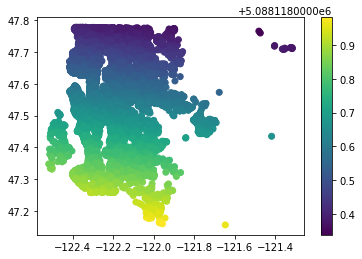

In [15]:
# Quickly check that it worked!
plt.scatter(sea_gdf['long'], sea_gdf['lat'], c=sea_gdf['distance_to_coast'])
plt.colorbar()

In [16]:
# Compute correlation matrix
corr_matrix = sea_gdf.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                                                        1.000000
sqft_living                                                  0.702296
bathrooms                                                    0.524395
percent of household income over 200K per year, per tract    0.501380
bedrooms                                                     0.315804
lat                                                          0.308082
sqft_lot                                                     0.090125
yr_built                                                     0.052453
long                                                         0.020092
distance_to_downtown                                        -0.195426
distance_to_coast                                           -0.312271
Name: price, dtype: float64

In [17]:
# Define feature list
feature_list =  ['price', 'distance_to_coast', 'bedrooms', 'bathrooms', 'sqft_living','lat','long', 'sqft_lot', 'yr_built',  'distance_to_downtown','percent of household income over 200K per year, per tract']

# Define features and labels 
X = sea_gdf[feature_list]
y = sea_gdf['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [18]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

34128.26468978097


*******

## Question 2 (30 points):

* Produce a model to predict house prices. You are welcome to generate new features, scale the data, and split the data into training/testing (i.e. `train_test_split`) in any way you like. 


* Evaluate your model's accuracy by predicting a test dataset, for example:

`predictions = forest_reg.predict(X_test)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)`


* Push your `lab5_submission.ipynb` to GitHub and submit a `.pdf` version to Canvas 



* On **Monday** the instructor and TA will provide an **unseen set of houses** which students will use to repeat their accuracy evaluation. The best models (i.e. lowest RMSE) will win prizes. 


* We will evaluate the models using a simple `mean-squared-error` as follows:

`mse = mean_squared_error(y_test , predictions)
rmse = np.sqrt(final_mse)`

*********

## Task 1 (10 points):

Submit a project idea to the `#final-projects` channel on **Slack**. See: https://github.com/JohnnyRyan1/geospatial-data-science/blob/master/labs/lab5/project_ideas_task.md for more details.


## Remember to submit your answers to Questions 1 and 2 and complete Task 1 **by Friday 11:59pm**